Now lets dive into the AIEMS ( Ai powered energy Management System )Project Backend Code

As our Flow chart starts from the Data Collection
We can collect the data from Pzem004T and Esp8266 Modules and send the data to the ThingSpeak and Retrive the data using the API Keys.
i have posted the smart meter that have created which is responsible to collect the data from the machines.

As of Now We Required The Lots of data to Build a Ai model we create our own Synthetic data of a industry machine

#synthetic data creation
''' Ranges'''
'''
  Current (4-6)
  voltage (207-253)
  power(in) = current * Voltage
  frequency 50 Hz and 60 Hz
  Speed = 120 x frequency (Hz) / 4
  torque =9.5488 x Power (kW) / Speed (RPM)
  power(out) = Torque *( 2 * 3.1416 * speed )/60
  Efficiency = P(out)/P(in)
  currentdrawn = ( 2 * 3.1416 * Speed * Torque ) / ( 60 * (Efficiency/100) * Voltage )

'''

In [1]:
print("Run time is working fine")

Run time is working fine


In [3]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
def func():
  start_time = datetime(2023, 9, 6, 0, 0, 0)
  end_time = datetime(2023, 10, 6, 0, 0, 0)
  time_step = timedelta(minutes=5)

  data = pd.DataFrame(columns=['Timestamp', 'Current (A)','Voltage (V)','Power(In)','Frequency (Hz)','Speed (rpm)', 'Torque (Nm)', 'Power (out)', 'Efficiency ( E)','CurrentDrawn (CD)'])

  current_time = start_time
  while current_time < end_time:
      current = random.uniform(4,6)
      voltage=random.uniform(207,253)
      Powerin = current * voltage
      frequency = random.uniform(50,60)
      speed = 120 * frequency/ 4
      torque = 9.5488 * Powerin/speed
      PowerOut = torque *( 2 * 3.1416 * speed )/60
      Efficiency = PowerOut/Powerin
      CurrentDrawn = ( 2 * 3.1416 * speed * torque ) / ( 60 * (Efficiency/100) * voltage )

      data = data.append({
          'Timestamp': current_time,
          'Current (A)' : current,
          'Voltage (V)': voltage,
          'Power (In)': Powerin,
          'Frequency (Hz)' :frequency ,
          'Speed (rpm)' :speed,
          'Torque (Nm)' :torque,
          'Power (out)' :PowerOut,
          'Efficiency ( E)' :Efficiency,
          'CurrentDrawn (CD)' :CurrentDrawn,


     }, ignore_index=True)

      current_time += time_step

  # Save the synthetic dataset to a CSV file
  data.to_csv('synthetic_motor_data.csv', index=False)
func()

Streaming output truncated to the last 5000 lines.
<ipython-input-3-50527c760216>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
<ipython-input-3-50527c760216>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
<ipython-input-3-50527c760216>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
<ipython-input-3-50527c760216>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({
<ipython-input-3-50527c760216>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.app

#now Data is created
We have 7 process that combined to complete our project so as we move in we discuss about each process and their models
As Our process 1 aims to identify the anomalies in the data by comparing the number of deviations to standard deviations


According to the BEE India Ministry of Power Energy Conservation Guidelines We need to create the standard and target values of every parameter

# Calculate the Standard and the Deviations by Data Analysis
#Standard = Average values
#Targets = Average Values - Standard Deviations

In [64]:
import matplotlib.pyplot as plt
Data = pd.read_csv('/content/synthetic_motor_data.csv')
data=Data

In [65]:
from sklearn.preprocessing import MinMaxScaler


data_to_normalize = data[['Current (A)', 'Voltage (V)', 'Power (In)', 'Frequency (Hz)', 'Speed (rpm)', 'Torque (Nm)', 'Power (out)', 'Efficiency ( E)', 'CurrentDrawn (CD)']]
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(data_to_normalize), columns=data_to_normalize.columns)
normalized_data = pd.concat([data[['Timestamp']], normalized_data], axis=1)


In [66]:
from sklearn.preprocessing import StandardScaler
data_to_normalize = data[['Current (A)', 'Voltage (V)', 'Power (In)', 'Frequency (Hz)', 'Speed (rpm)', 'Torque (Nm)', 'Power (out)', 'Efficiency ( E)', 'CurrentDrawn (CD)']]

scaler = StandardScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(data_to_normalize), columns=data_to_normalize.columns)
normalized_data = pd.concat([data[['Timestamp']], normalized_data], axis=1)


In [67]:
Data=normalized_data
print(Data)

                Timestamp  Current (A)  Voltage (V)  Power (In)  \
0     2023-09-06 00:00:00    -0.283303    -0.753118   -0.582129   
1     2023-09-06 00:05:00    -0.079790     1.031246    0.389539   
2     2023-09-06 00:10:00    -0.430297    -1.661898   -1.097678   
3     2023-09-06 00:15:00    -1.171731    -0.728612   -1.336688   
4     2023-09-06 00:20:00     0.151868    -1.135189   -0.383043   
...                   ...          ...          ...         ...   
8635  2023-10-05 23:35:00    -0.059819     1.184821    0.477297   
8636  2023-10-05 23:40:00    -0.439117     0.253802   -0.285454   
8637  2023-10-05 23:45:00     0.428037    -1.531008   -0.338209   
8638  2023-10-05 23:50:00     1.297029    -0.617826    0.847169   
8639  2023-10-05 23:55:00     1.052833    -0.560377    0.664462   

      Frequency (Hz)  Speed (rpm)  Torque (Nm)  Power (out)  Efficiency ( E)  \
0           0.996204     0.996204    -0.883532    -0.582129     1.110223e-16   
1           0.109597     0.109597  

               Timestamp  Current (A)  Voltage (V)  Power (In)  \
0    2023-09-06 00:00:00    -0.283303    -0.753118   -0.582129   
1    2023-09-06 00:05:00    -0.079790     1.031246    0.389539   
2    2023-09-06 00:10:00    -0.430297    -1.661898   -1.097678   
3    2023-09-06 00:15:00    -1.171731    -0.728612   -1.336688   
4    2023-09-06 00:20:00     0.151868    -1.135189   -0.383043   
...                  ...          ...          ...         ...   
8635 2023-10-05 23:35:00    -0.059819     1.184821    0.477297   
8636 2023-10-05 23:40:00    -0.439117     0.253802   -0.285454   
8637 2023-10-05 23:45:00     0.428037    -1.531008   -0.338209   
8638 2023-10-05 23:50:00     1.297029    -0.617826    0.847169   
8639 2023-10-05 23:55:00     1.052833    -0.560377    0.664462   

      Frequency (Hz)  Speed (rpm)  Torque (Nm)  Power (out)  Efficiency ( E)  \
0           0.996204     0.996204    -0.883532    -0.582129     1.110223e-16   
1           0.109597     0.109597     0.295542 

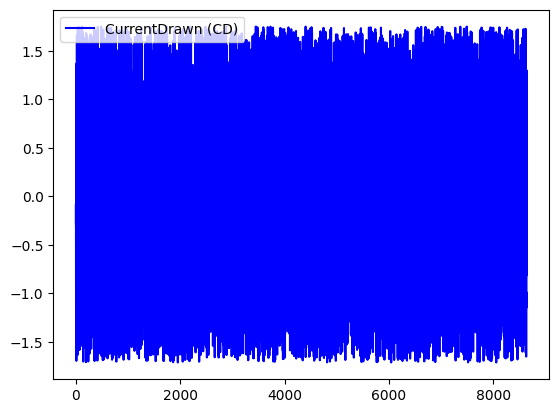

In [68]:

Data['Timestamp'] = pd.to_datetime(Data['Timestamp'])
print(Data)

parameter = Data[['CurrentDrawn (CD)']]
print(parameter)
average = Data[['CurrentDrawn (CD)']].mean()
print (average)
parameter.plot(kind='line',color='blue')
plt.show()

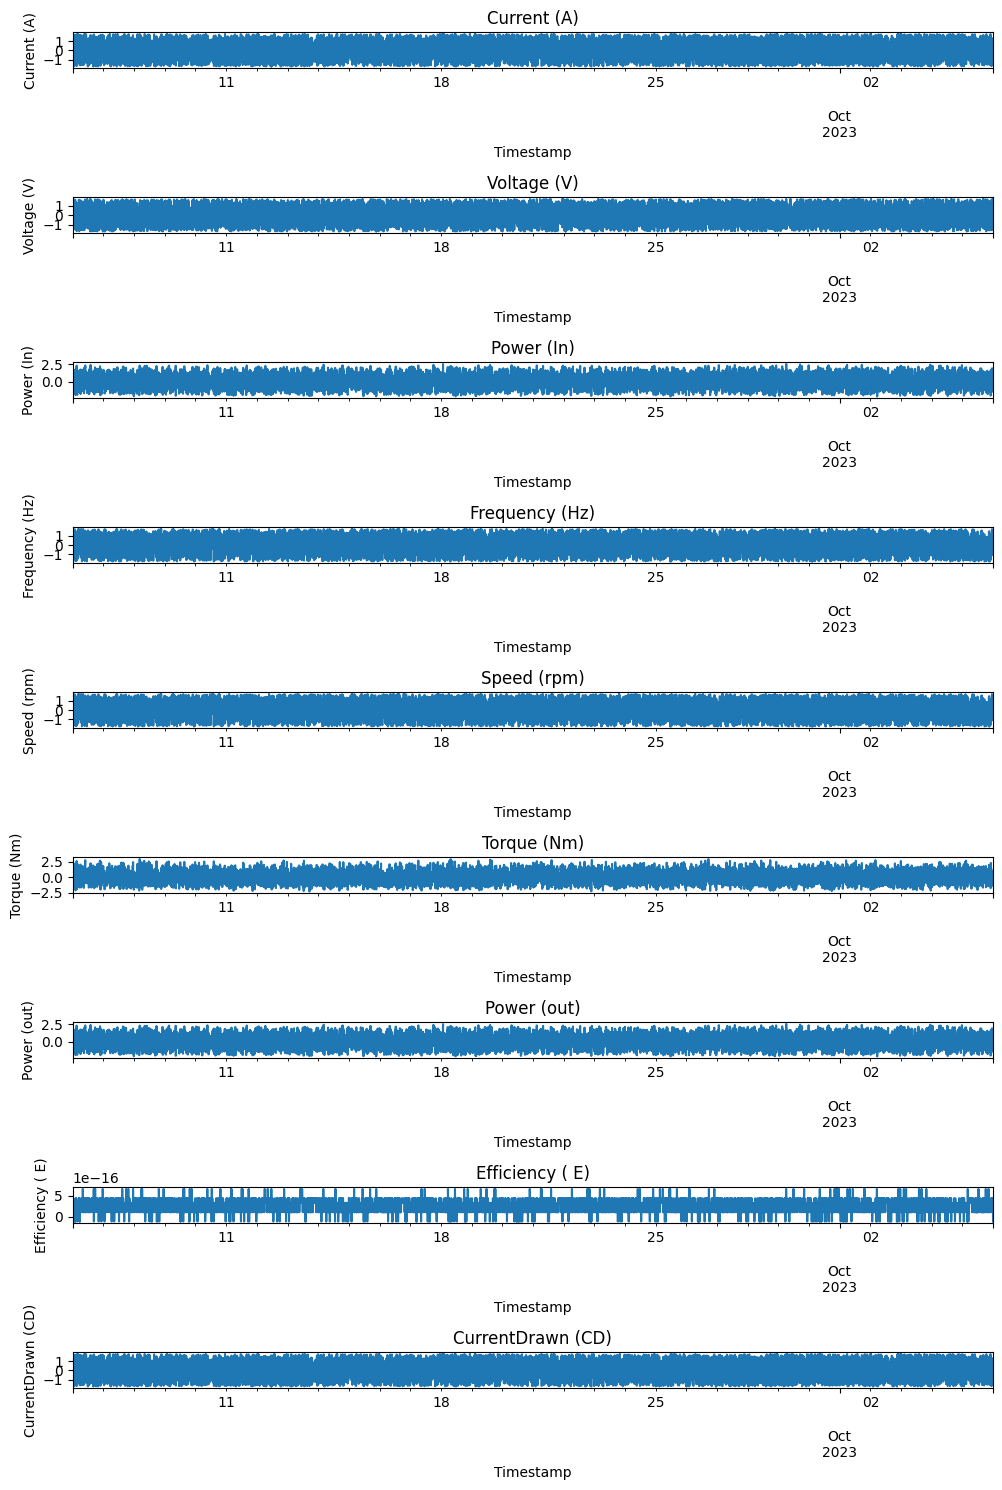

In [69]:

Data['Timestamp'] = pd.to_datetime(Data['Timestamp'])
Data.drop(['Power (In)'],axis=1)
Data.set_index('Timestamp', inplace=True)

fig, axes = plt.subplots(nrows=len(Data.columns), figsize=(10, 15))
for i, col in enumerate(Data.columns):
    Data[col].plot(ax=axes[i], title=col)
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


In [70]:
j=0
standards=[]
for i, col in enumerate(Data.columns):
    standards.append(Data[col].mean())
    print(col)
    print(Data[col].mean())
    j=i+1

print(standards)

Current (A)
3.64317629562181e-16
Voltage (V)
1.758881106605225e-15
Power (In)
-1.0473103865630644e-15
Frequency (Hz)
-1.6332614273374524e-15
Speed (rpm)
-6.357054800261082e-16
Torque (Nm)
7.56596431596403e-17
Power (out)
4.529298746757815e-16
Efficiency ( E)
3.0131504287540854e-16
CurrentDrawn (CD)
4.083153568343631e-16
[3.64317629562181e-16, 1.758881106605225e-15, -1.0473103865630644e-15, -1.6332614273374524e-15, -6.357054800261082e-16, 7.56596431596403e-17, 4.529298746757815e-16, 3.0131504287540854e-16, 4.083153568343631e-16]


#settingup Upperlimit and lowerlimit of the data

In [71]:
standardupperlimit=[]
standardlowerlimit=[]

for i, col in enumerate(Data.columns):
  print(col)
for i in standards:
  standardupperlimit.append(i+(2.5 / 100) * i )
  standardlowerlimit.append(i-(2.5/100)*i)


print('Upperlimit is ')
print(standardupperlimit)
print('lower limit is')
print(standardlowerlimit)

Current (A)
Voltage (V)
Power (In)
Frequency (Hz)
Speed (rpm)
Torque (Nm)
Power (out)
Efficiency ( E)
CurrentDrawn (CD)
Upperlimit is 
[3.7342557030123555e-16, 1.8028531342703557e-15, -1.073493146227141e-15, -1.6740929630208888e-15, -6.515981170267609e-16, 7.755113423863131e-17, 4.64253121542676e-16, 3.088479189472938e-16, 4.185232407552222e-16]
lower limit is
[3.552096888231265e-16, 1.7149090789400942e-15, -1.0211276268989877e-15, -1.592429891654016e-15, -6.198128430254555e-16, 7.376815208064928e-17, 4.4160662780888697e-16, 2.937821668035233e-16, 3.98107472913504e-16]


#standard deviations

In [72]:
standarddeviations=[]
for i,col in enumerate(Data.columns):
  standarddeviations.append(Data[col].std())
print(standarddeviations)

[1.0000578753943246, 1.0000578753943246, 1.0000578753943246, 1.0000578753943246, 1.0000578753943248, 1.0000578753943248, 1.0000578753943246, 1.2143983262114558e-16, 1.0000578753943246]


#identifying the Target Values


In [73]:
j=0
Target=[]
for i, col in enumerate(Data.columns):
    Target.append(Data[col].mean()+Data[col].std())
    print(col)
    j=i+1

print(Target)

Current (A)
Voltage (V)
Power (In)
Frequency (Hz)
Speed (rpm)
Torque (Nm)
Power (out)
Efficiency ( E)
CurrentDrawn (CD)
[1.000057875394325, 1.0000578753943263, 1.0000578753943234, 1.000057875394323, 1.0000578753943241, 1.0000578753943248, 1.000057875394325, 4.2275487549655414e-16, 1.000057875394325]


#setting up the upper and lower limits for target values

In [74]:
Targetupperlimit=[]
Targetlowerlimit=[]

for i, col in enumerate(Data.columns):
  print(col)
for i in Target:
  Targetupperlimit.append(i+(2.5 / 100) * i )
  Targetlowerlimit.append(i-(2.5/100)*i)


print('Upperlimit is ')
print(Targetupperlimit)
print('lower limit is')
print(Targetlowerlimit)
print("Standards")
print(standards)
print("Targets")
print(Target)
print(Data)

Current (A)
Voltage (V)
Power (In)
Frequency (Hz)
Speed (rpm)
Torque (Nm)
Power (out)
Efficiency ( E)
CurrentDrawn (CD)
Upperlimit is 
[1.025059322279183, 1.0250593222791844, 1.0250593222791815, 1.025059322279181, 1.0250593222791822, 1.0250593222791828, 1.025059322279183, 4.33323747383968e-16, 1.025059322279183]
lower limit is
[0.9750564285094668, 0.9750564285094682, 0.9750564285094654, 0.975056428509465, 0.975056428509466, 0.9750564285094666, 0.9750564285094668, 4.121860036091403e-16, 0.9750564285094668]
Standards
[3.64317629562181e-16, 1.758881106605225e-15, -1.0473103865630644e-15, -1.6332614273374524e-15, -6.357054800261082e-16, 7.56596431596403e-17, 4.529298746757815e-16, 3.0131504287540854e-16, 4.083153568343631e-16]
Targets
[1.000057875394325, 1.0000578753943263, 1.0000578753943234, 1.000057875394323, 1.0000578753943241, 1.0000578753943248, 1.000057875394325, 4.2275487549655414e-16, 1.000057875394325]
                     Current (A)  Voltage (V)  Power (In)  Frequency (Hz)  \
T

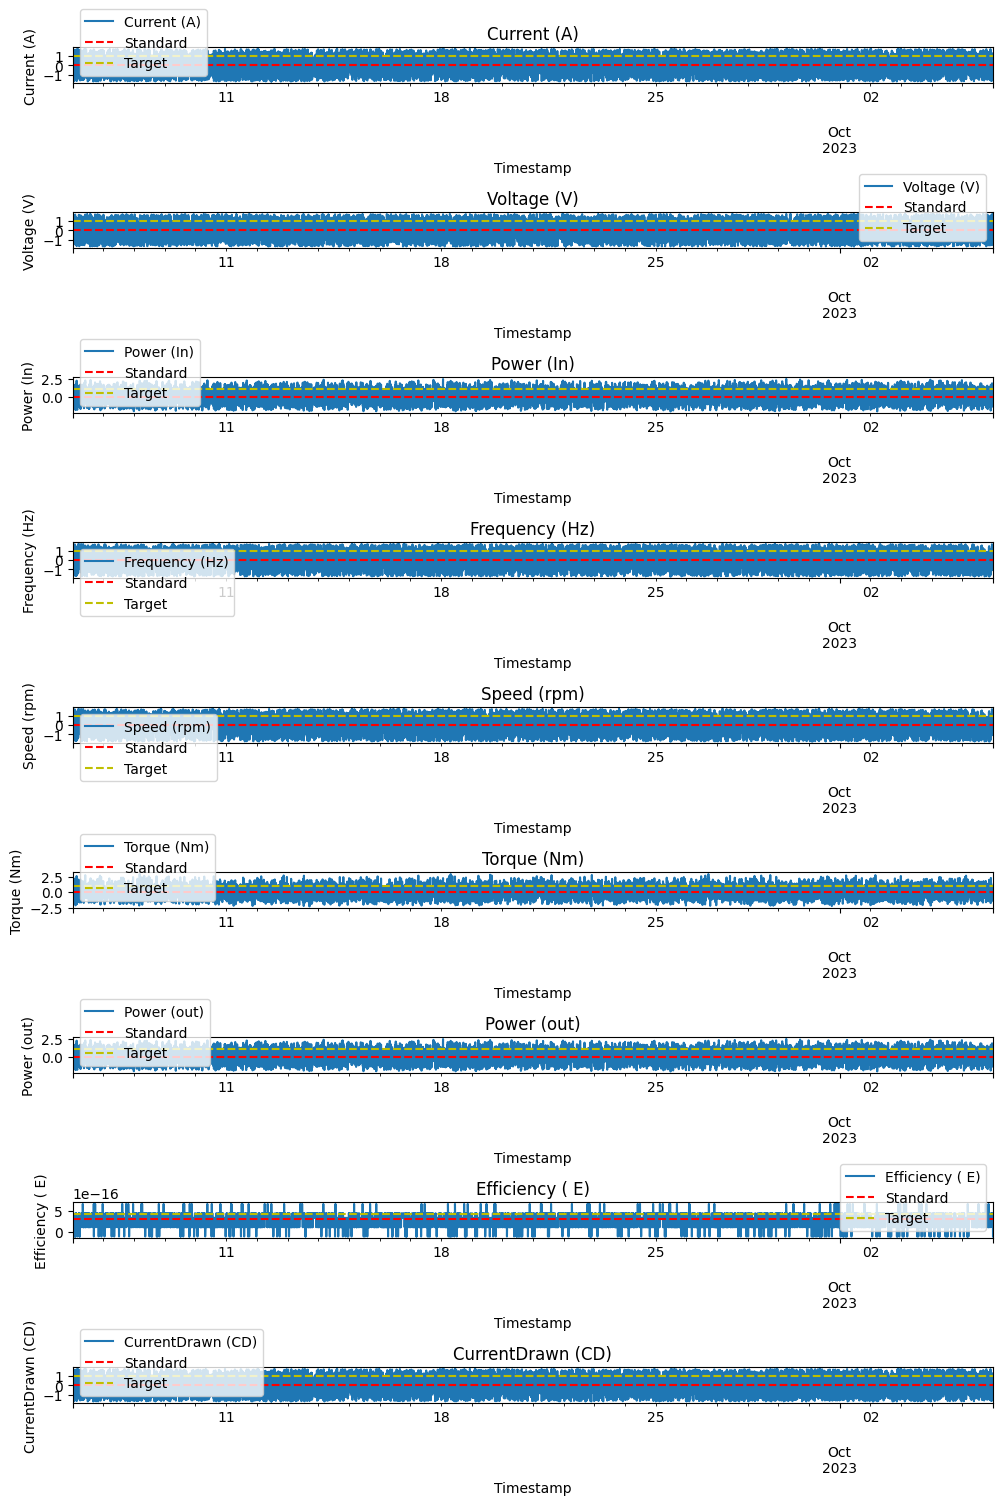

In [75]:
Data.reset_index(inplace=True)
Data.set_index('Timestamp', inplace=True)

fig, axes = plt.subplots(nrows=len(Data.columns), figsize=(10, 15))
for i, col in enumerate(Data.columns):
    Data[col].plot(ax=axes[i], title=col)

    # Plot standard and target lines
    axes[i].axhline(y=standardupperlimit[i], color='r', linestyle='--', label='Standard')
    axes[i].axhline(y=Targetupperlimit[i], color='y', linestyle='--', label='Target')

    axes[i].set_ylabel(col)
    axes[i].legend()  # Show legend for lines

plt.tight_layout()
plt.show()


#identify the Threshold  
If the data is the normalised form then the threshold for the deviations is 2 or 3 times of standard deviations


In [127]:
import math
Threshold=[]

# Using list comprehension to remove 'NaN' values

stddev = [x for x in standarddeviations if not math.isnan(x)]

for i in stddev:
   Threshold.append(round(3*i))

print(Threshold)
print(stddev)
deviation=0
for i, j in zip(Threshold, stddev):
    if i < j:
        print("Deviation is identified")
        deviation += 1

if deviation > 2:#if more than one parameter is deviated then we can conclude it as the anomalies
    print("Anomalies are identified")
else:
  print("No Anomalies as the deviations are in limit")

[3, 3, 3, 3, 3, 3, 3, 0, 3]
[1.0000578753943246, 1.0000578753943246, 1.0000578753943246, 1.0000578753943246, 1.0000578753943248, 1.0000578753943248, 1.0000578753943246, 1.2143983262114558e-16, 1.0000578753943246]
Deviation is identified
No Anomalies as the deviations are in limit


Hence based on Above two arrays we are able to compare and identify the anomalies

Creating the Prediction Model For our data # Process 2

In [87]:
#imports
import sys
import statsmodels as ss
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


Mean Squared Error: 0.00019905948056661379


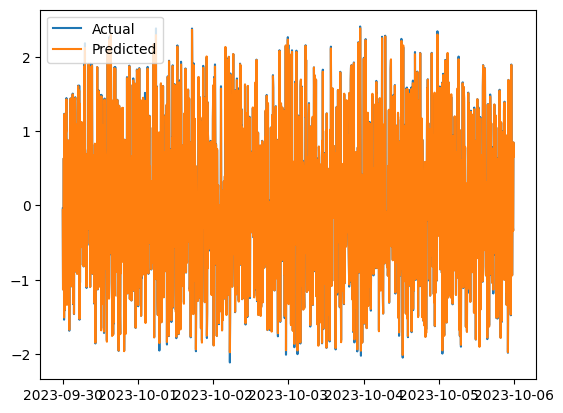

In [100]:

features = ['Current (A)', 'Voltage (V)', 'Frequency (Hz)', 'Speed (rpm)', 'Torque (Nm)']

# Target: Power (out)
target = 'Power (out)'

# Drop NaN values for simplicity
data = Data.dropna()

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Prepare the training and testing sets
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

# Initialize the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Plot the actual vs. predicted values
plt.plot(test.index, y_test, label='Actual')
plt.plot(test.index, predictions, label='Predicted')
plt.legend()
plt.show()


In [136]:
#Energy consuption patterns of the Dataset

EData = pd.read_csv('/content/synthetic_motor_data.csv')
# print(EData)
EData['Timestamp'] = pd.to_datetime(EData['Timestamp'])

#  Timestamp is in datetime format
EData['Timestamp'] = pd.to_datetime(EData['Timestamp'])

# Calculate time interval in minutes
EData['Time Interval'] = EData['Timestamp'].diff().dt.total_seconds() / 60

# Calculate Energy
EData['Energy'] = EData['Power (In)'] * EData['Time Interval']

# Drop the 'Time Interval' column if you don't need it anymore
EData = EData.drop(columns=['Time Interval'])

print(EData['Energy'])

0               NaN
1       6017.963154
2       4921.699169
3       4745.519398
4       5448.474306
           ...     
8635    6082.651643
8636    5520.409583
8637    5481.522233
8638    6355.293411
8639    6220.615166
Name: Energy, Length: 8640, dtype: float64


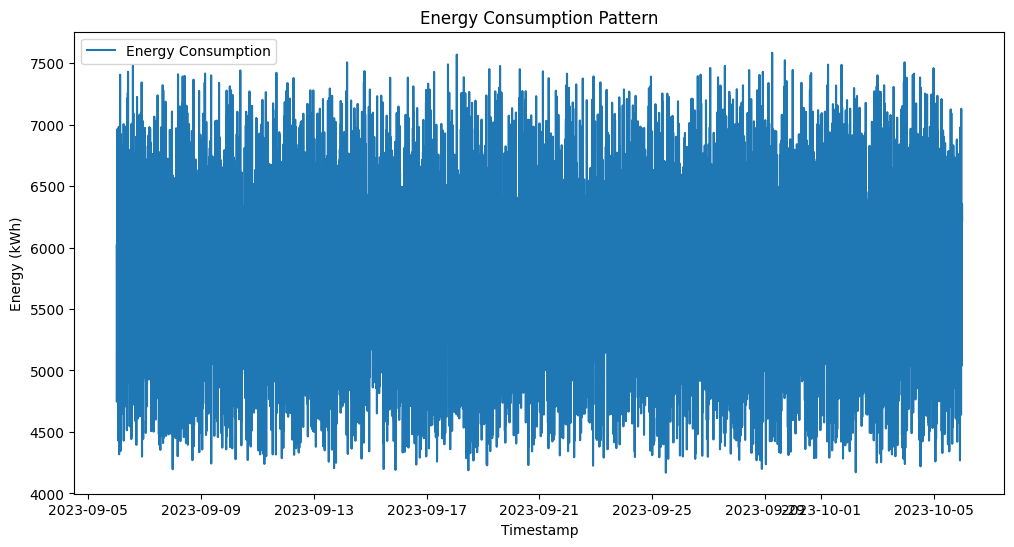

In [137]:
# Plot the Energy consumption pattern
plt.figure(figsize=(12, 6))
plt.plot(EData['Timestamp'], EData['Energy'], label='Energy Consumption')
plt.title('Energy Consumption Pattern')
plt.xlabel('Timestamp')
plt.ylabel('Energy (kWh)')
plt.legend()
plt.show()


Process 4 Is Identifying the Machine is in Ideal State or the Working State.
By analysing the Current Drawn parameter we can identify the Machine status

In [140]:
# As we generated our synthetic data assuming machine is always running state
# if we know the min thresold current is 100 by using below method we can identify the state of a machine
#assuming min is 350
threshold_current = 350

# Create a new column 'Machine State' based on the threshold
EData['Machine State'] = EData['CurrentDrawn (CD)'].apply(lambda x: 'Ideal so Hybernate' if x < threshold_current else 'Working')

# Print the resulting DataFrame with the 'Machine State' column
print(EData[['Timestamp', 'CurrentDrawn (CD)', 'Machine State']])


               Timestamp  CurrentDrawn (CD) Machine State
0    2023-09-06 00:00:00         482.589030       Working
1    2023-09-06 00:05:00         494.333273       Working
2    2023-09-06 00:10:00         474.106400       Working
3    2023-09-06 00:15:00         431.320095       Working
4    2023-09-06 00:20:00         507.701680       Working
...                  ...                ...           ...
8635 2023-10-05 23:35:00         495.485770       Working
8636 2023-10-05 23:40:00         473.597427       Working
8637 2023-10-05 23:45:00         523.638686       Working
8638 2023-10-05 23:50:00         573.786058       Working
8639 2023-10-05 23:55:00         559.694082       Working

[8640 rows x 3 columns]


Process 5 Is Finance Model where we calculate the Current Bill and power consuption. I have based the telangana Tariff and calculated the current Bill .This Process i have done in an angular project and i have uploaded it in this repository please do check it

In [ ]:
# Using NLP creating the recomandation system

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import joblib

# Load the CSV file containing your data
data = pd.read_csv("/content/Guidelinesdataset2.csv")

# Split the data into training and evaluation sets
train_data, eval_data = train_test_split(data, test_size=0.2, random_state=42)

# Define a simple Bag-of-Words (BoW) vectorizer and a Multinomial Naive Bayes classifier
vectorizer = CountVectorizer()
classifier = MultinomialNB()

# Create a text classification pipeline
pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('classifier', classifier),
])

# Fit the pipeline on the training data
pipeline.fit(train_data['Process'] + " " + train_data['Machines'], train_data['Guidelines'])

# Save the pipeline to a file for later use
joblib.dump(pipeline, 'text_classifier.pkl')

# Load the trained pipeline
# pipeline = joblib.load('text_classifier.pkl')

# User input handling
user_input = input("Enter the process or equipment: ")

# Make predictions based on user input
predicted_guidelines = pipeline.predict([user_input])[0]

# Print the predicted guidelines
print("Simplified Energy Consumption Guidelines:")
print(predicted_guidelines)
